In [100]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler,StandardScaler
import seaborn as sp
from imblearn.over_sampling import SMOTE

In [101]:
df=pd.read_csv("Weather.csv")
df

,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
0,43815.00000,6.220954,0.0,0.000000e+00,-72.0,215.0,0.0,80.6,6.9,32.0,4.7
1,43815.00347,6.220954,0.0,0.000000e+00,-73.0,0.0,0.0,80.6,6.9,32.0,4.7
2,43815.00694,6.205565,0.0,0.000000e+00,-76.0,0.0,0.0,80.4,6.9,32.0,4.7
3,43815.01042,6.190173,0.0,0.000000e+00,-77.0,0.0,0.0,80.2,6.9,32.0,4.7
4,43815.01389,6.162624,0.0,0.000000e+00,-75.0,0.0,0.0,80.9,6.7,32.0,4.7
...,...,...,...,...,...,...,...,...,...,...,...
47804,43980.98611,9.286397,0.0,9.999999e-01,-85.0,2992.0,0.0,71.4,15.1,2.0,4.3
47805,43980.98958,9.242139,0.0,1.000000e+00,-85.0,2992.0,0.0,71.5,15.0,2.0,4.3
47806,43980.99306,9.152067,0.0,3.350000e-08,-84.0,2992.0,0.0,70.8,15.0,2.0,3.8
47807,43980.99653,9.177802,0.0,0.000000e+00,-85.0,2992.0,0.0,71.0,15.0,2.0,3.8


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47809 entries, 0 to 47808
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   %time      47809 non-null  float64
 1   AbsHumOut  47738 non-null  float64
 2   Iglob      47738 non-null  float64
 3   PARout     47738 non-null  float64
 4   Pyrgeo     47738 non-null  float64
 5   RadSum     47738 non-null  float64
 6   Rain       47738 non-null  float64
 7   Rhout      47738 non-null  float64
 8   Tout       47738 non-null  float64
 9   Winddir    47738 non-null  float64
 10  Windsp     47738 non-null  float64
dtypes: float64(11)
memory usage: 4.0 MB


# Treating null values

In [4]:
df.isnull().sum()

%time         0
AbsHumOut    71
Iglob        71
PARout       71
Pyrgeo       71
RadSum       71
Rain         71
Rhout        71
Tout         71
Winddir      71
Windsp       71
dtype: int64

In [5]:
df.columns

Index(['%time', 'AbsHumOut', 'Iglob', 'PARout', 'Pyrgeo', 'RadSum', 'Rain',
       'Rhout', 'Tout', 'Winddir', 'Windsp'],
      dtype='object')

In [6]:
df["AbsHumOut"].fillna(df["AbsHumOut"].median(),inplace=True)

df["PARout"].fillna(df["PARout"].median(),inplace=True)

df["Pyrgeo"].fillna(df["Pyrgeo"].median(),inplace=True)

df["Rhout"].fillna(df["Rhout"].median(),inplace=True)

df["Tout"].fillna(df["Tout"].median(),inplace=True)

df["Winddir"].fillna(df["Winddir"].median(),inplace=True)

df["Windsp"].fillna(df["Windsp"].median(),inplace=True)

df["Iglob"].fillna(df["Iglob"].median(),inplace=True)

df["Rhout"].fillna(df["Rhout"].median(),inplace=True)

df["RadSum"].fillna(df["RadSum"].median(),inplace=True)

df["Rain"]=df["Rain"].fillna(df["Rain"].mode()[0]) #mode is the best option to fill na values since rain has categorical values 

# Checking for duplicates entries

In [7]:
df.duplicated().sum()

0

# Checking for correlation between variables

<AxesSubplot:>

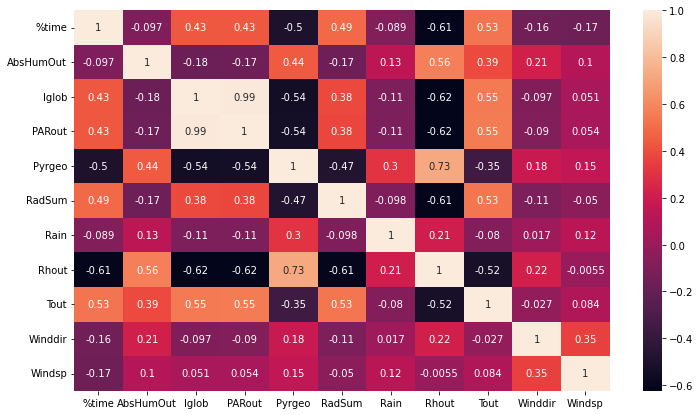

In [8]:
plt.figure(figsize=(12,7))
sp.heatmap(df.corr(),annot=True)

from here we can conclude that factors like PAR weather measurement and Solar Radiation are highly correlated or dependent on 
each other.

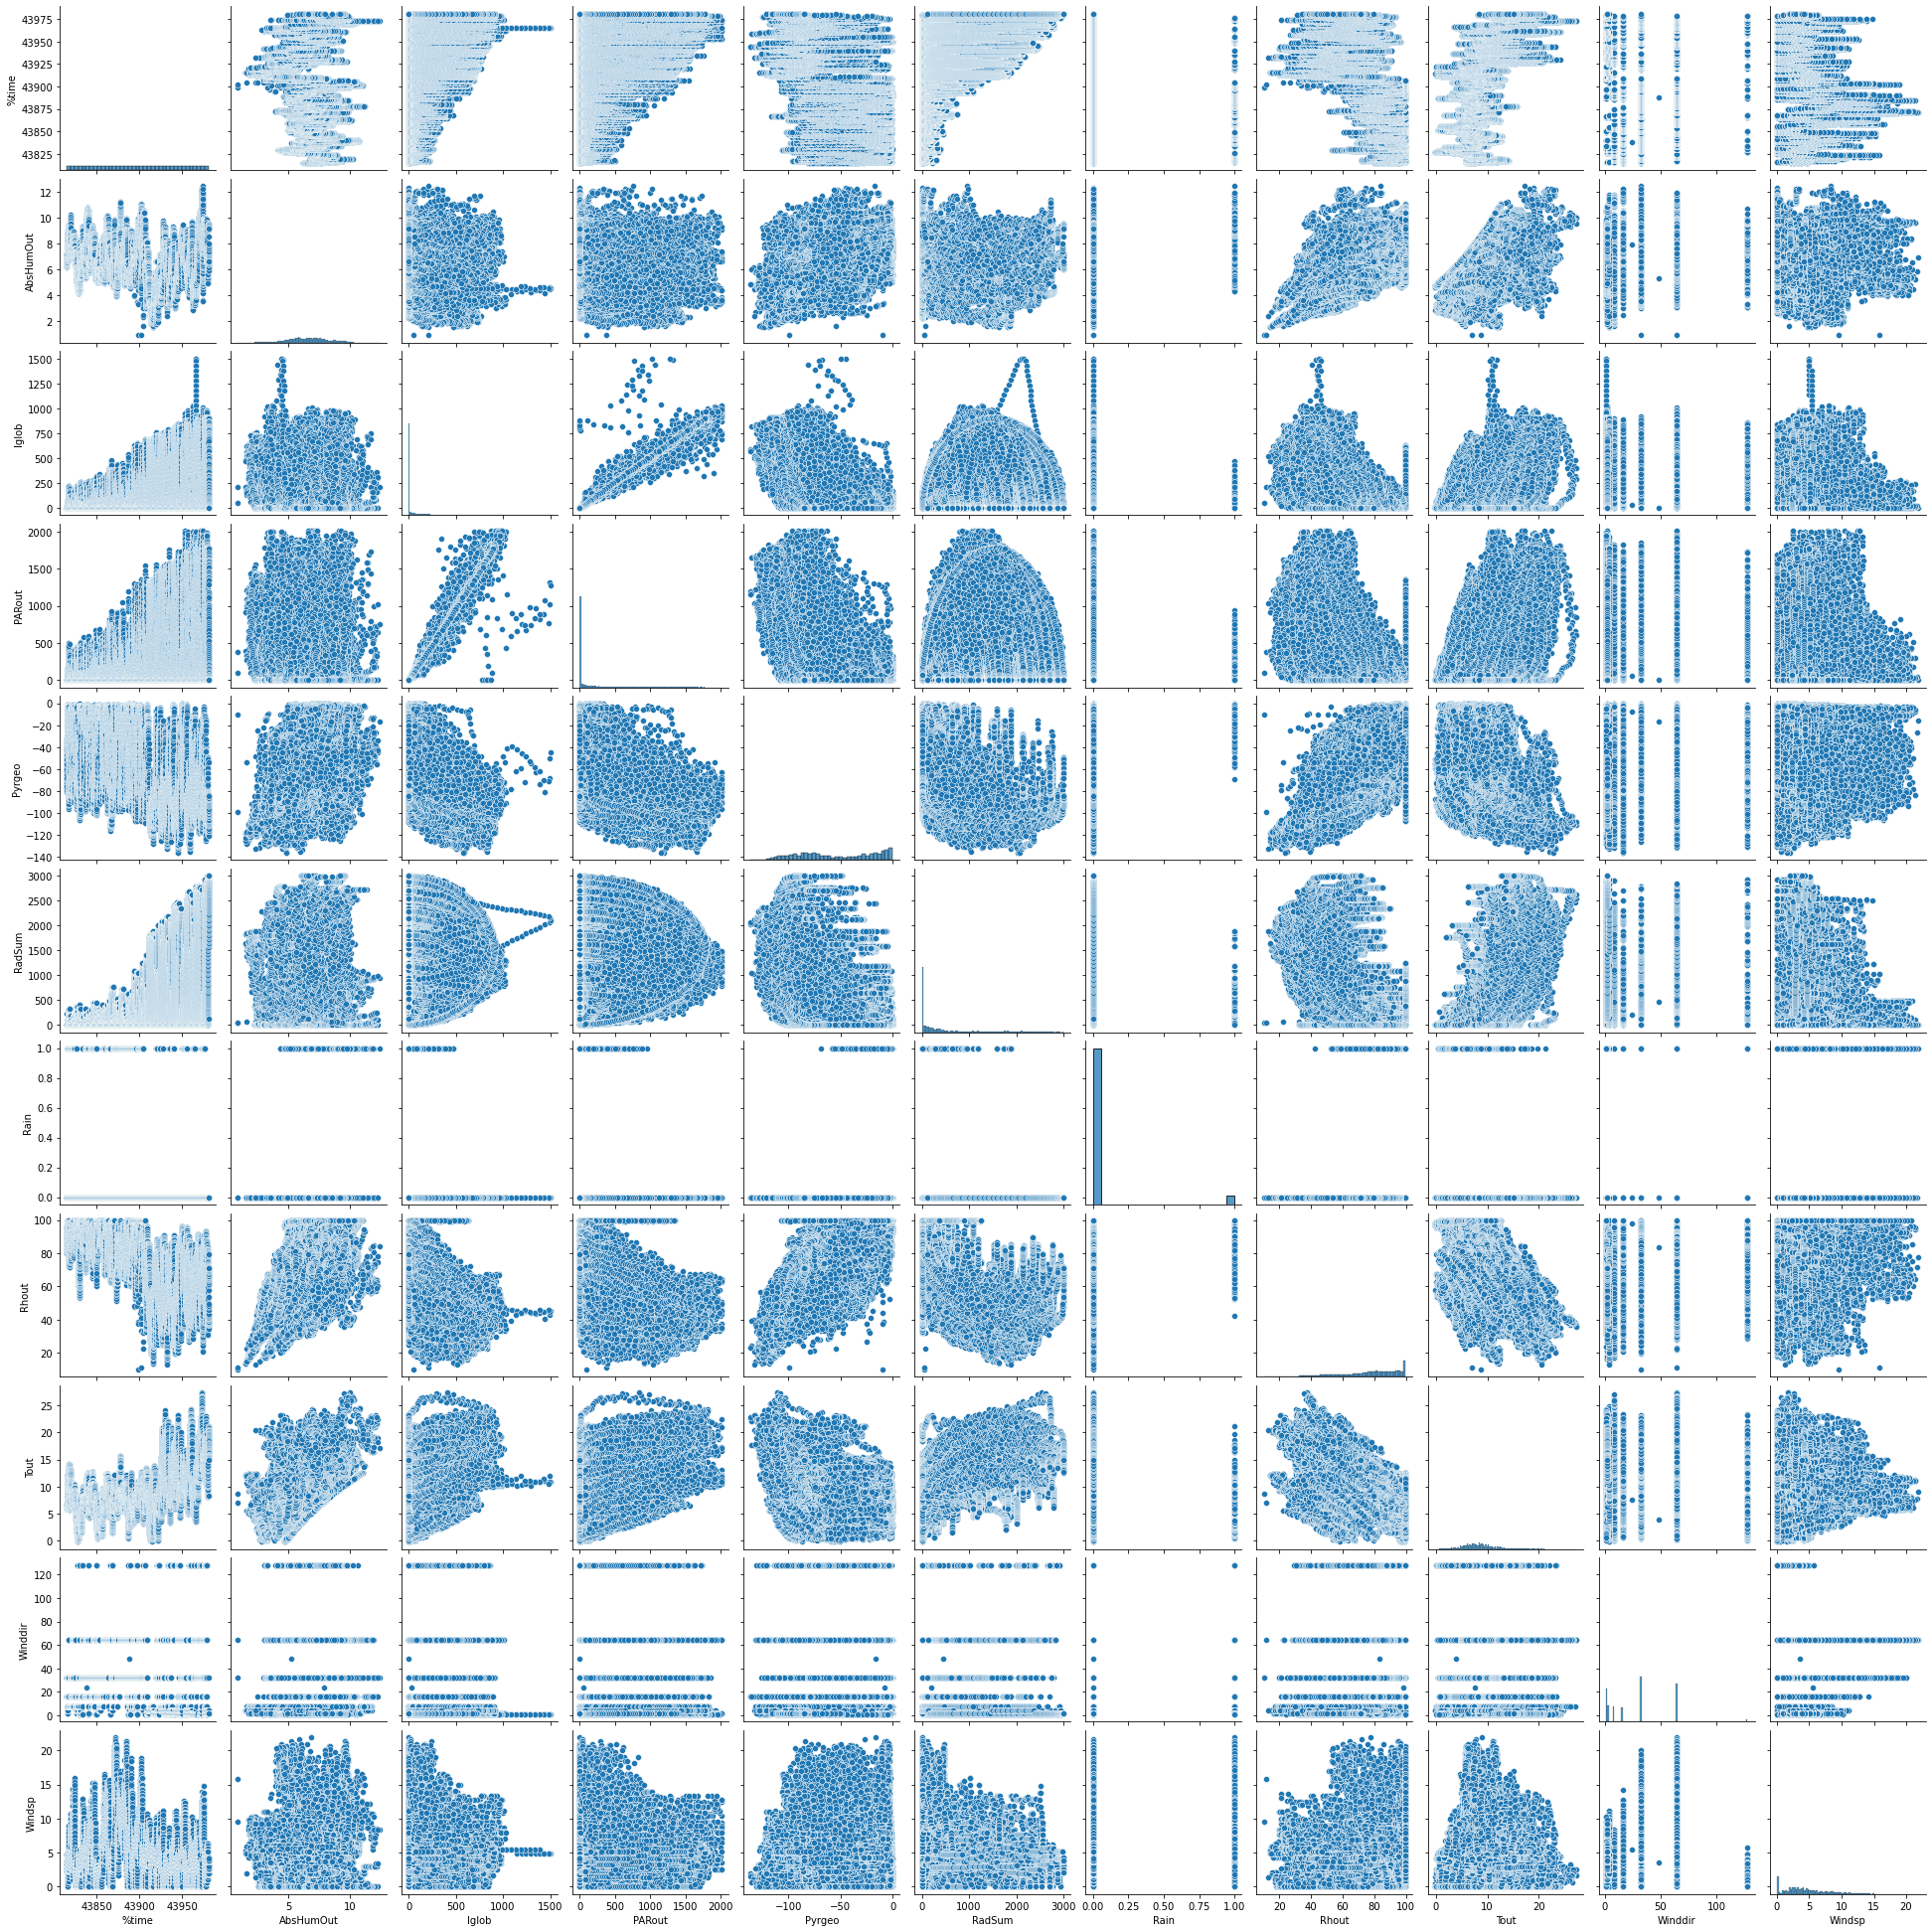

In [9]:
sp.pairplot(df)

PAR weather measurement and Solar Radiation does show high linearity

In [10]:
df.columns

Index(['%time', 'AbsHumOut', 'Iglob', 'PARout', 'Pyrgeo', 'RadSum', 'Rain',
       'Rhout', 'Tout', 'Winddir', 'Windsp'],
      dtype='object')

If we go through the documentation we can see that rain variable should only contain categorical varaibles 0(dry) and 1(rain)
Therefore removing all the error values i.e,all values other than 0 and 1

In [11]:
df["Rain"].value_counts()

0.000000e+00    44922
1.000000e+00     2151
6.710000e-08      103
9.999999e-01      103
9.999999e-01       98
1.340000e-07       93
3.350000e-08       91
1.010000e-07       90
9.999999e-01       81
1.000000e+00       77
Name: Rain, dtype: int64

In [12]:
df_error=df[(df.Rain>0)&(df.Rain<1)]
df_error

,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
177,43815.61458,8.031785,24.000000,53.000000,-18.000000,85.000000,1.010000e-07,92.0,8.8,16.0,2.7
178,43815.61806,8.127439,24.000000,56.000000,-18.000000,86.000000,9.999999e-01,93.1,8.8,16.0,2.7
179,43815.62153,8.092380,21.000000,51.000000,-18.000000,87.000000,6.710000e-08,93.3,8.7,16.0,2.7
181,43815.62847,8.179610,18.000001,43.000001,-15.000000,88.000000,9.999999e-01,93.7,8.8,16.0,2.7
182,43815.63194,8.179610,25.999999,52.999999,-16.000000,89.000000,1.340000e-07,93.7,8.8,16.0,2.7
...,...,...,...,...,...,...,...,...,...,...,...
46368,43976.00000,9.444516,0.000000,0.000000,-18.000000,645.999935,9.999999e-01,76.8,14.2,64.0,4.8
46369,43976.00347,9.594641,0.000000,0.000000,-15.000000,0.000065,1.010000e-07,80.0,13.8,64.0,4.8
46381,43976.04514,9.678536,0.000000,0.000000,-16.000000,0.000000,6.710000e-08,80.2,13.9,64.0,4.3
46382,43976.04861,9.748601,0.000000,0.000000,-11.000001,0.000000,9.999999e-01,81.8,13.7,64.0,4.3


In [13]:
df.drop(df[(df['Rain'] > 0) & (df['Rain'] < 1)].index, inplace=True)

In [14]:
df.shape

(47073, 11)

In [38]:
sp.set(font_scale = 1.5)

<AxesSubplot:ylabel='Rain'>

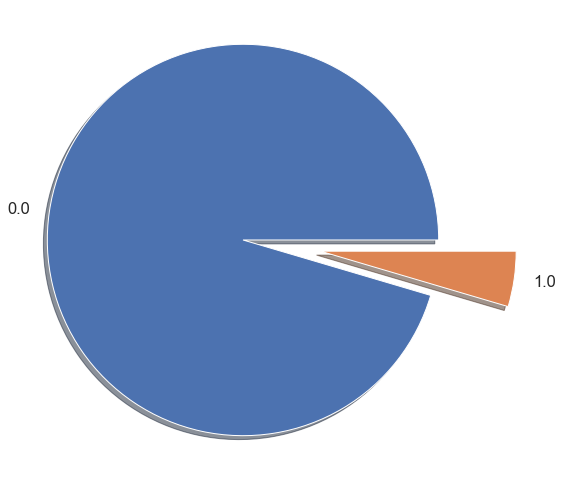

In [39]:
df['Rain'].value_counts().plot(kind='pie',figsize=(20,9),shadow=True,explode=[0.4,0]) 

From here we can conclude that maximum times it didnot rain

# Scaling

In [16]:
scaling=MinMaxScaler()
norm=scaling.fit_transform(df[['AbsHumOut', 'Iglob', 'PARout', 'Pyrgeo', 'RadSum', 'Rain',
       'Rhout', 'Tout', 'Winddir', 'Windsp']])
norm

array([[4.62577008e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.58181819e-01, 2.44094488e-01, 2.17592593e-01],
       [4.62577008e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.58181819e-01, 2.44094488e-01, 2.17592593e-01],
       [4.61244320e-01, 0.00000000e+00, 0.00000000e+00, ...,
        2.58181819e-01, 2.44094488e-01, 2.17592593e-01],
       ...,
       [7.16396186e-01, 0.00000000e+00, 1.66666667e-11, ...,
        5.52727274e-01, 7.87401575e-03, 1.75925927e-01],
       [7.18624703e-01, 0.00000000e+00, 0.00000000e+00, ...,
        5.52727274e-01, 7.87401575e-03, 1.75925926e-01],
       [4.92684304e-01, 0.00000000e+00, 4.97512438e-04, ...,
        3.12727273e-01, 2.44094488e-01, 1.94444444e-01]])

In [17]:
df[['AbsHumOut', 'Iglob', 'PARout', 'Pyrgeo', 'RadSum', 'Rain',
       'Rhout', 'Tout', 'Winddir', 'Windsp']]=norm
df

,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
0,43815.00000,0.462577,0.0,0.000000e+00,0.470588,0.071691,0.0,0.786830,0.258182,0.244094,0.217593
1,43815.00347,0.462577,0.0,0.000000e+00,0.463235,0.000000,0.0,0.786830,0.258182,0.244094,0.217593
2,43815.00694,0.461244,0.0,0.000000e+00,0.441176,0.000000,0.0,0.784598,0.258182,0.244094,0.217593
3,43815.01042,0.459911,0.0,0.000000e+00,0.433824,0.000000,0.0,0.782366,0.258182,0.244094,0.217593
4,43815.01389,0.457526,0.0,0.000000e+00,0.448529,0.000000,0.0,0.790179,0.250909,0.244094,0.217593
...,...,...,...,...,...,...,...,...,...,...,...
47804,43980.98611,0.728028,0.0,4.975124e-04,0.375000,0.997666,0.0,0.684152,0.556364,0.007874,0.199074
47805,43980.98958,0.724196,0.0,4.975124e-04,0.375000,0.997666,0.0,0.685268,0.552727,0.007874,0.199074
47806,43980.99306,0.716396,0.0,1.666667e-11,0.382353,0.997666,0.0,0.677455,0.552727,0.007874,0.175926
47807,43980.99653,0.718625,0.0,0.000000e+00,0.375000,0.997666,0.0,0.679687,0.552727,0.007874,0.175926


# Removing outliers

In [18]:
df.columns

Index(['%time', 'AbsHumOut', 'Iglob', 'PARout', 'Pyrgeo', 'RadSum', 'Rain',
       'Rhout', 'Tout', 'Winddir', 'Windsp'],
      dtype='object')

{'whiskers': [<matplotlib.lines.Line2D at 0x284c777d220>,
 'caps': [<matplotlib.lines.Line2D at 0x284c777d7c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x284c7771f10>,
 'medians': [<matplotlib.lines.Line2D at 0x284c777dd60>,
 'fliers': [<matplotlib.lines.Line2D at 0x284c7789070>,
 'means': []}

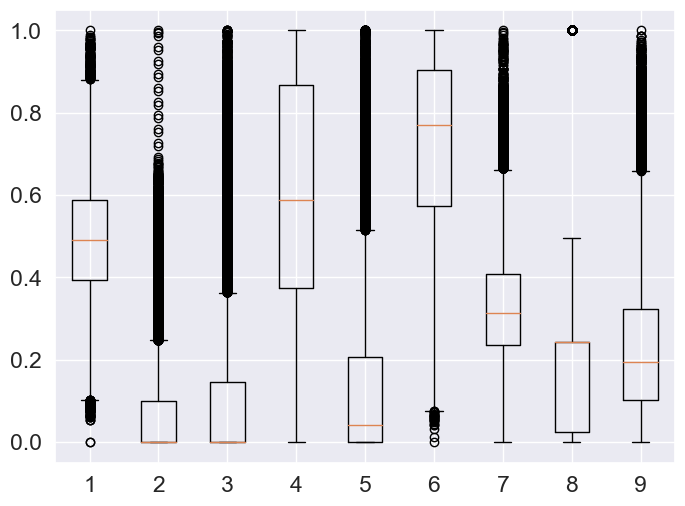

In [57]:
plt.figure(figsize=(8,6), dpi=100)
plt.boxplot(df[["AbsHumOut","Iglob","PARout","Pyrgeo",'RadSum',
       'Rhout', 'Tout', 'Winddir', 'Windsp']])

In [20]:
df.columns

Index(['%time', 'AbsHumOut', 'Iglob', 'PARout', 'Pyrgeo', 'RadSum', 'Rain',
       'Rhout', 'Tout', 'Winddir', 'Windsp'],
      dtype='object')

In [21]:
Q1=df.AbsHumOut.quantile(0.25) 
Q3=df.AbsHumOut.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df_out=df[(df.AbsHumOut>lower_limit)&(df.AbsHumOut<upper_limit)]

In [22]:
Q1=df_out.Iglob.quantile(0.25) 
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df_out1=df_out[(df_out.Iglob>lower_limit)&(df_out.Iglob<upper_limit)]

In [23]:
Q1=df_out1.PARout.quantile(0.25) 
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df_out2=df_out1[(df_out1.PARout>lower_limit)&(df_out1.PARout<upper_limit)]

In [24]:
Q1=df_out2.RadSum.quantile(0.25)
Q3=df_out2.RadSum.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df_out3=df_out2[(df_out2.RadSum>lower_limit)&(df_out2.RadSum<upper_limit)]

In [25]:
Q1=df_out3.Rhout.quantile(0.25) 
Q3=df_out3.Rhout.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df_out4=df_out3[(df_out3.Rhout>lower_limit)&(df_out3.Rhout<upper_limit)]

In [26]:
Q1=df_out4.Tout.quantile(0.25) 
Q3=df_out4.Tout.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df_out5=df_out4[(df_out4.Tout>lower_limit)&(df_out4.Tout<upper_limit)]

In [27]:
Q1=df_out5.Winddir.quantile(0.25) 
Q3=df_out5.Winddir.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df_out6=df_out5[(df_out5.Winddir>lower_limit)&(df_out5.Winddir<upper_limit)]

In [28]:
Q1=df_out6.Windsp.quantile(0.25) 
Q3=df_out6.Windsp.quantile(0.75)
IQR=Q3-Q1
lower_limit=Q1-1.5*IQR
upper_limit=Q3+1.5*IQR
df_out_final=df_out6[(df_out6.Windsp>lower_limit)&(df_out6.Windsp<upper_limit)]

In [29]:
df_out_final.shape

(27745, 11)

# Before removing outliers Vs After removing outliers

Text(0.5, 0, 'After removing outliers')

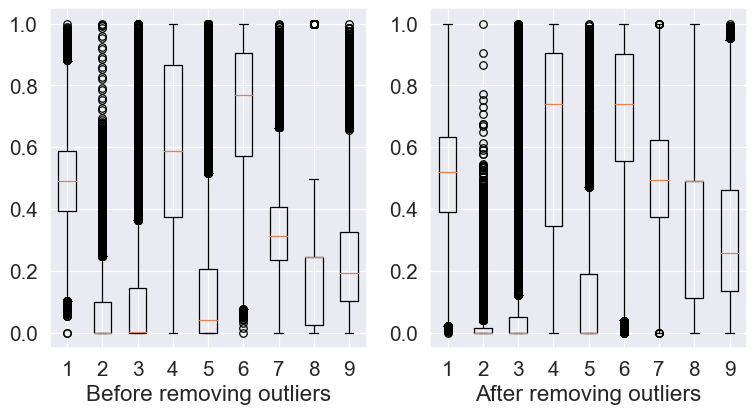

In [75]:
plt.figure(figsize=(10,5), dpi=90)
plt.subplot(1,2,1)
plt.boxplot(df[["AbsHumOut","Iglob","PARout","Pyrgeo",'RadSum',
       'Rhout', 'Tout', 'Winddir', 'Windsp']])
plt.xlabel("Before removing outliers")

plt.subplot(1,2,2)
plt.boxplot(df_out_final[["AbsHumOut","Iglob","PARout","Pyrgeo",'RadSum',
       'Rhout', 'Tout', 'Winddir', 'Windsp']])
plt.xlabel("After removing outliers")

As we can see outliers are removed upto a great extent

# Some Analysis

In [120]:
df_out_final.describe()

,%time,AbsHumOut,Iglob,PARout,Pyrgeo,RadSum,Rain,Rhout,Tout,Winddir,Windsp
count,27745.000000,27745.000000,27745.000000,27745.000000,27745.000000,2.774500e+04,27745.000000,27745.000000,27745.000000,27745.000000,27745.000000
mean,43877.454648,0.521357,0.042419,0.106444,0.644951,1.331968e-01,0.068084,0.707487,0.497946,0.443298,0.307698
std,43.896858,0.177347,0.092225,0.224934,0.286156,2.226680e-01,0.251895,0.229183,0.191958,0.348198,0.237567
min,43815.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,43841.100690,0.389278,0.000000,0.000000,0.346154,0.000000e+00,0.000000,0.556936,0.375000,0.111111,0.134615
50%,43869.475690,0.521178,0.000000,0.000000,0.740385,3.867282e-07,0.000000,0.739130,0.493056,0.492063,0.256410
75%,43904.253470,0.634349,0.016129,0.048980,0.903846,1.884615e-01,0.000000,0.902692,0.625000,0.492063,0.461538
max,43981.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000


Text(0, 0.5, 'Temperature in Celcius')

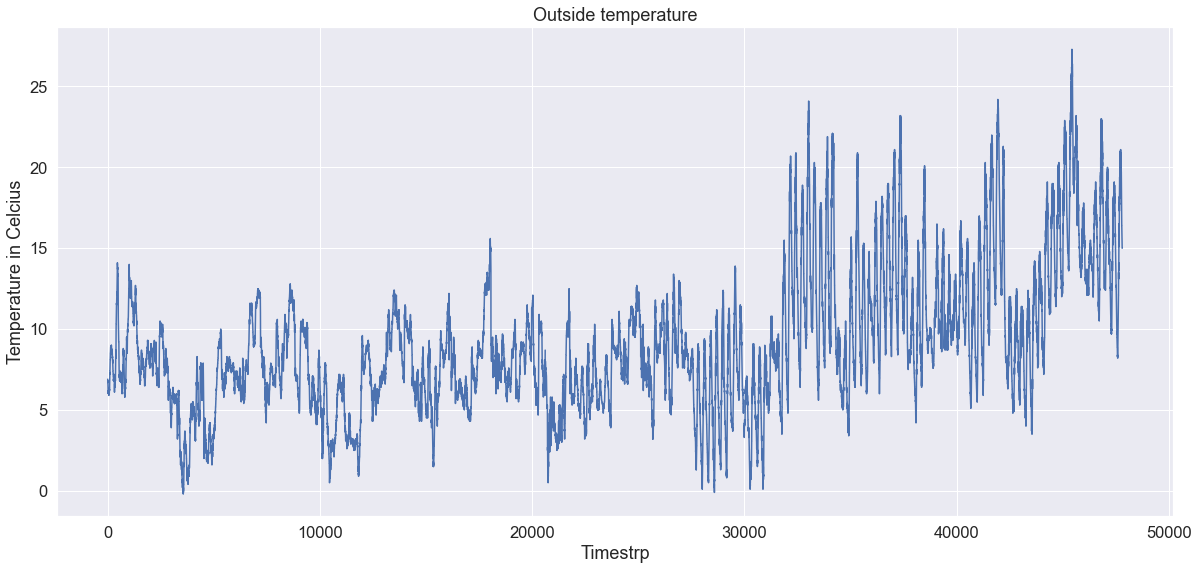

In [126]:
df["Tout"].plot(kind="line",figsize=(20,9))
plt.title("Outside temperature")
plt.xlabel("Timestrp")
plt.ylabel("Temperature in Celcius")

In [111]:
df["Tout"].max() 

27.29999993

Temperature ranges from 0-15 celcius normally but as time passes tempertaure instead of falling keeps increasing and the max it reaches is 27°C

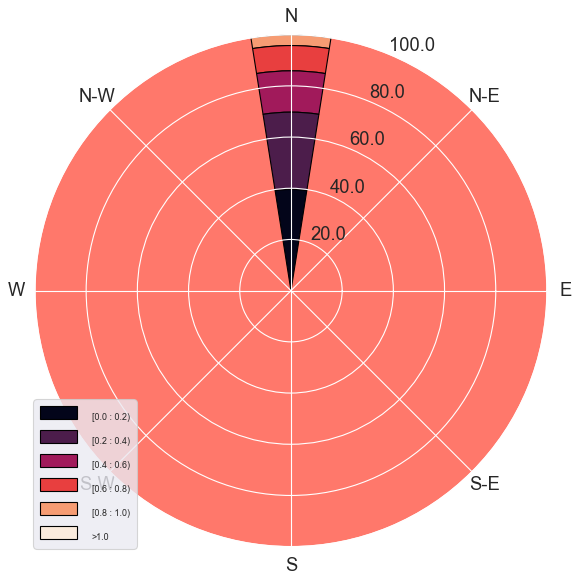

In [112]:
from windrose import WindroseAxes
ax=WindroseAxes.from_ax()
ax.set_facecolor((1.0, 0.47, 0.42))
ax.bar(df_out_final.Winddir,df_out_final.Windsp,normed=True,opening=0.8,edgecolor="Black")
ax.set_legend()

From this chart we can say that wind is flowing only in the north direction,the more towards north the speed of the wind increases

Text(0, 0.5, 'Radiation Sum in J/cm2')

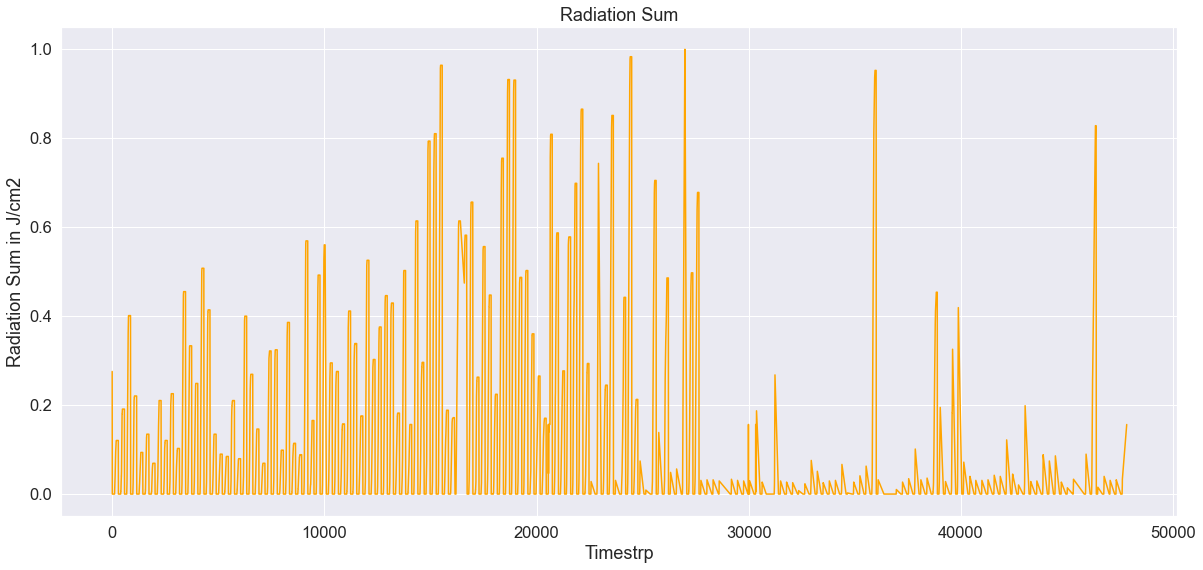

In [135]:
df_out_final["RadSum"].plot(kind="line",figsize=(20,9),color="Orange")
plt.title("Radiation Sum")
plt.xlabel("Timestrp")
plt.ylabel("Radiation Sum in J/cm2")

Most of the radiation sum is at 0 and the maximum it reaches as can be seen in the graph is 1

# Saving cleaned data in output.csv 

In [138]:
df_out_final.to_csv('output.csv', index=False)

Upto this part it was only about analysis but handling imabalanced data will help when we build a ml model

# Handling imabalanced data for further machine learning model

In [33]:
x=df_out_final.drop("Rain",axis="columns")
y=df_out_final["Rain"]

In [34]:
smote=SMOTE(sampling_strategy="minority") #what smote does it it balances the ratio of the minority to majority
x_sm,y_sm=smote.fit_resample(x,y)

In [35]:
y.value_counts()

0.0    25856
1.0     1889
Name: Rain, dtype: int64

In [36]:
y_sm.value_counts()

0.0    25856
1.0    25856
Name: Rain, dtype: int64